In [1]:
%matplotlib widget
# %matplotlib notebook
# %matplotlib inline

from gamesopt.train_distributed import train, TrainDistributedConfig
from gamesopt.games import load_game, GameOptions
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
from gamesopt.optimizer.quantization import QuantizationOptions, QuantizationType
import torch
from collections import defaultdict
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
config = TrainDistributedConfig()
config.game.quadratic_options.num_samples = 10
config.game.quadratic_options.dim = 2
config.num_iter = 100
config.game.quadratic_options.bias = True
config.optimizer.quantization_options =  QuantizationOptions(quantization_type=QuantizationType.NONE)
print(config)

TrainDistributedConfig(game=GameOptions(game_type=<GameType.QUADRATIC: 'quadratic'>, quadratic_options=QuadraticGameConfig(num_samples=10, dim=2, num_players=2, bias=True, mu=0.0, ell=None, importance_sampling=False, matrix=None), kelly_auction_options=KellyAuctionConfig(bidding_cost=100, ressources=1000, marginal_utility_gains=(1.8, 2.0, 2.2, 2.4)), robust_linear_reg_options=RobustLinRegConfig(num_samples=10, dim=2, lambda_coeff=0.2, gamma_coeff=0.2), bilinear_options=BilinearGameConfig(num_samples=10, dim=2, bias=True)), optimizer=OptimizerOptions(optimizer_type=<OptimizerType.SGDARA: 'SGDARA'>, lr=0.5, lr_e=None, p=None, alpha=None, full_batch=False, batch_size=1, N=None, T=1, quantization_options=QuantizationOptions(quantization_type=<QuantizationType.NONE: 'none'>, k=5)), prox=ProxOptions(prox_type=<ProxType.NONE: 'none'>, l1_reg=0.01, ball_radius=1.0), num_iter=100, seed=1234, name='', save_file=None, load_file=None, precision=1.0, n_process=3)


Trying port 14061
Init...  1
Starting...
e3ff366a-1ad2-4fe5-abca-f4d439273367
Init...  0
Starting...
e3ff366a-1ad2-4fe5-abca-f4d439273367
Init...  2
Starting...
e3ff366a-1ad2-4fe5-abca-f4d439273367


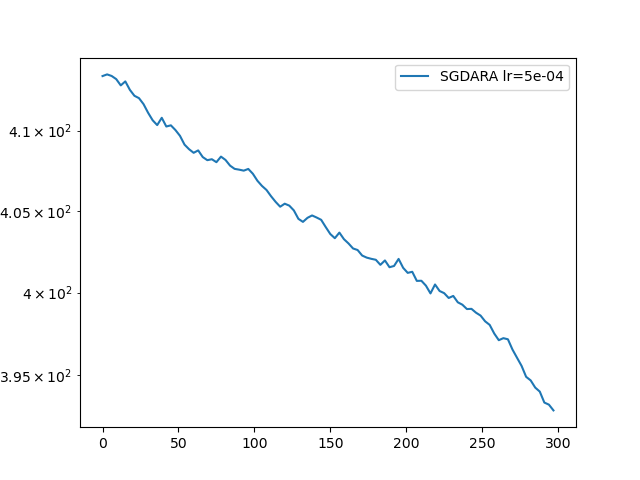

In [33]:
plt.figure()
plt.yscale('log')

config.optimizer.lr = 5e-4
config.optimizer.optimizer_type = OptimizerType.SGDARA
record = train(config)
record.load_metrics()

# plt.figure()
plt.plot(record.metrics.num_grad, record.metrics.hamiltonian,
         label="%s lr=%.e" % (config.optimizer.optimizer_type.value, config.optimizer.lr))
plt.yscale('log')
plt.legend()
plt.show()